In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("your_file.csv")
print(data.head())

   Experience  Education  Age  Salary
0           1         12   22   25000
1           2         12   24   30000
2           3         14   26   38000
3           4         14   28   45000
4           5         15   30   52000


In [4]:
x=data[['Experience','Education','Age']]
y=data['Salary']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [6]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
print("Intercept:",mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept: -39729.729729729705
Coefficients: [1512.43243243 -372.97297297 3024.86486486]


In [8]:
y_pred = mlr.predict(x_test)

In [9]:
print("Actual:", list(y_test))
print("Predicted:", y_pred)

Actual: [82000, 30000]
Predicted: [82113.51351351 31416.21621622]


In [10]:
# Prediction for a new sample
input_data = [[6, 16, 30]] 
predicted_salary = mlr.predict(input_data) 
print("Predicted Salary for new employee:", predicted_salary[0])

Predicted Salary for new employee: 54123.243243243254


E:\anaconda3\envs\ml_lab\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


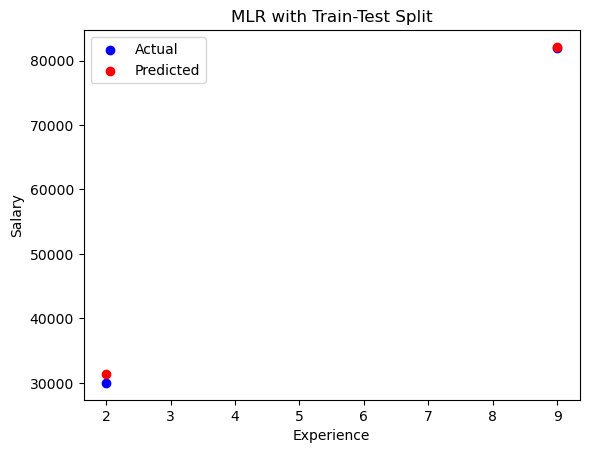

In [12]:
plt.scatter(x_test['Experience'], y_test, color='blue', label='Actual')
plt.scatter(x_test['Experience'], y_pred, color='red', label='Predicted')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("MLR with Train-Test Split")
plt.legend()
plt.show()


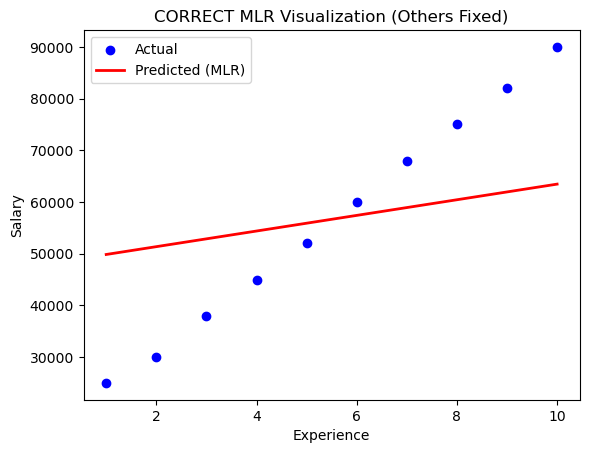

In [13]:
# Fix Education & Age at their mean values
edu_mean = data['Education'].mean()
age_mean = data['Age'].mean()

# Vary Experience smoothly
exp_range = np.linspace(data['Experience'].min(), data['Experience'].max(), 100)

X_fixed = pd.DataFrame({
    'Experience': exp_range,
    'Education': [edu_mean]*100,
    'Age': [age_mean]*100
})

y_pred_fixed = mlr.predict(X_fixed)

# Plot
plt.scatter(data['Experience'], y, color='blue', label='Actual')
plt.plot(exp_range, y_pred_fixed, color='red', linewidth=2, label='Predicted (MLR)')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("CORRECT MLR Visualization (Others Fixed)")
plt.legend()
plt.show()
